In [7]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.0 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd

In [10]:
import seaborn as sns

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay, f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/2022/Pragati_projects/Review_Summarization/Reviews.csv.zip

Archive:  /content/drive/MyDrive/2022/Pragati_projects/Review_Summarization/Reviews.csv.zip
  inflating: Reviews.csv             


In [9]:
data= pd.read_csv('/content/Reviews.csv', nrows=100000)

In [5]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
X= data['Summary']

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
X.apply(type).value_counts()

<class 'str'>      99998
<class 'float'>        2
Name: Summary, dtype: int64

In [ ]:
X=X.apply(lambda x: str(x))

In [ ]:
y= X.apply(lambda x: analyser.polarity_scores(x))

In [ ]:
def pos_neg(x):
    if x['pos']>x['neg']:
        return 'positive'
    else:
        return 'negative'

In [ ]:
data['Vader_sentiment']= y.apply(pos_neg)

In [ ]:
# y1= data['Text'].apply(lambda x: analyser.polarity_scores(x[:100]))

In [ ]:
for i in range(len(data)):
    x=data['Vader_sentiment'].iloc[i]
    if x=='neutral':
        text= data['Text'].iloc[i]
        y1=  analyser.polarity_scores(text[:100])
        data['Vader_sentiment'].iloc[i]= 'positive' if y1['pos']>y1['neg'] else 'negetive'


In [ ]:
data.head(20)

,Summary,Text,Vader_sentiment
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,Great taffy,Great taffy at a great price. There was a wid...,positive
5,Nice Taffy,I got a wild hair for taffy and ordered this f...,positive
6,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,positive
7,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,positive
8,Yay Barley,Right now I'm mostly just sprouting this so my...,positive
9,Healthy Dog Food,This is a very healthy dog food. Good for thei...,positive


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


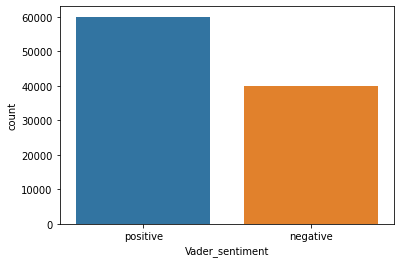

In [ ]:
sns.countplot(data['Vader_sentiment'])

In [ ]:
bow_transformer = CountVectorizer().fit(data['Text'])

In [ ]:
print(len(bow_transformer.vocabulary_))

55986


In [ ]:
messages_bow = bow_transformer.transform(data['Text'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [ ]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [ ]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=500, n_init=1)
model.fit(messages_tfidf)

KMeans(max_iter=500, n_clusters=2, n_init=1)

In [ ]:
def prediction(text):
    try:
        X=bow_transformer.transform([text])
        X = tfidf_transformer.transform(X)
        predicted = model.predict(X)
        # print(predicted)
        return predicted
    except:
        return 0


In [ ]:
predictions=[]
for i in range(0,100000,100):
    df= data[i:i+100]
    y2= df['Summary'].apply(prediction)
    print(i)
    for x in y2:
        predictions.append(x)
    # print(len(predictions))

In [ ]:
type(predictions[i])

int

In [ ]:
len(predictions)

100000

In [ ]:
data['tfidf_predictions']= predictions

In [ ]:
data['tfidf_predictions']= data['tfidf_predictions'].apply(lambda x: 'positive' if x==0 else 'negative')

In [ ]:
# data.to_csv('prediction2.csv',index=False)

In [ ]:
X= data['Summary']

In [ ]:
X=X.apply(lambda x: str(x))

In [ ]:
y= data['Vader_sentiment'].apply(lambda x: 0 if x=='positive' else 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42)

In [ ]:
X_train

array(['Love This Coffee', 'Skeptic, converted', 'lovely gift', ...,
       'Great Product for Older Cats', 'Chocolate was all melt',
       'why this price?'], dtype=object)

In [ ]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

In [ ]:
svc= SVC()

svc.fit(tfidf_train_vectors, y_train)

SVC()

In [ ]:
predict_svc= svc.predict(tfidf_test_vectors)

In [ ]:
for i in range(len(X_test)):
    print("Summary: ",X_test[i])
    if predict_svc[i]==0:
        print("sentiment: POSITIVE")
    else:
        print("sentiment: NEGATIVE")

Streaming output truncated to the last 5000 lines.
Summary:  "Curiously Strong"
sentiment: POSITIVE
Summary:  ARTIFICIAL Flavors
sentiment: NEGATIVE
Summary:  Superb
sentiment: POSITIVE
Summary:  My finicky dog loves these!
sentiment: POSITIVE
Summary:  Edible
sentiment: NEGATIVE
Summary:  Decent
sentiment: NEGATIVE
Summary:  Gave me that extra kick I needed...
sentiment: NEGATIVE
Summary:  Perfect pasta, healthy choice
sentiment: POSITIVE
Summary:  They make the best baby food.
sentiment: POSITIVE
Summary:  Lindt is no more!
sentiment: NEGATIVE
Summary:  Breakfast Blennd is good coffee and more earth friendly
sentiment: POSITIVE
Summary:  So far, it works for me.
sentiment: NEGATIVE
Summary:  Replacing processed or fake sugar
sentiment: NEGATIVE
Summary:  Quite Simply......
sentiment: NEGATIVE
Summary:  He loves sweet potatos, but this one is runny
sentiment: POSITIVE
Summary:  Outstanding!
sentiment: POSITIVE
Summary:  descent, but not THAT good...
sentiment: NEGATIVE
Summary:  Excel

In [ ]:
print(confusion_matrix(y_test,predict_svc))

[[17424   604]
 [  510 11462]]


In [ ]:
print(classification_report(y_test,predict_svc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18028
           1       0.95      0.96      0.95     11972

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000



In [ ]:
rfc = RandomForestClassifier()
rfc.fit(tfidf_train_vectors, y_train)

RandomForestClassifier()

In [ ]:
predict_rfc= rfc.predict(tfidf_test_vectors)

In [ ]:
for i in range(len(X_test)):
    print("Summary: ",X_test[i])
    if predict_rfc[i]==0:
        print("sentiment: POSITIVE")
    else:
        print("sentiment: NEGATIVE")

Streaming output truncated to the last 5000 lines.
Summary:  "Curiously Strong"
sentiment: POSITIVE
Summary:  ARTIFICIAL Flavors
sentiment: NEGATIVE
Summary:  Superb
sentiment: POSITIVE
Summary:  My finicky dog loves these!
sentiment: POSITIVE
Summary:  Edible
sentiment: NEGATIVE
Summary:  Decent
sentiment: NEGATIVE
Summary:  Gave me that extra kick I needed...
sentiment: NEGATIVE
Summary:  Perfect pasta, healthy choice
sentiment: POSITIVE
Summary:  They make the best baby food.
sentiment: POSITIVE
Summary:  Lindt is no more!
sentiment: NEGATIVE
Summary:  Breakfast Blennd is good coffee and more earth friendly
sentiment: POSITIVE
Summary:  So far, it works for me.
sentiment: NEGATIVE
Summary:  Replacing processed or fake sugar
sentiment: NEGATIVE
Summary:  Quite Simply......
sentiment: POSITIVE
Summary:  He loves sweet potatos, but this one is runny
sentiment: POSITIVE
Summary:  Outstanding!
sentiment: POSITIVE
Summary:  descent, but not THAT good...
sentiment: NEGATIVE
Summary:  Excel

In [ ]:
print(confusion_matrix(y_test,predict_rfc))

[[17543   485]
 [  606 11366]]


In [ ]:
print(classification_report(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18028
           1       0.96      0.95      0.95     11972

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000



**EDA**

In [ ]:
predictions= pd.read_csv('/content/prediction2.csv')

In [ ]:
predictions.head()

,Summary,Text,Vander_sentiment,tfidf_predictions
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,positive
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,positive
2,"""Delight"" says it all",This is a confection that has been around a fe...,positive,positive
3,Cough Medicine,If you are looking for the secret ingredient i...,negative,positive
4,Great taffy,Great taffy at a great price. There was a wid...,positive,positive


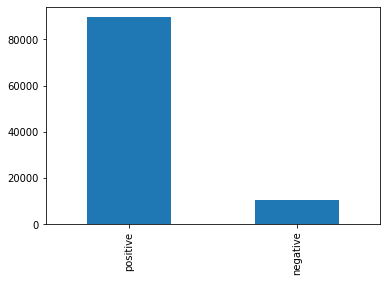

In [ ]:
predictions['tfidf_predictions'].value_counts().plot(kind='bar')

In [ ]:
import seaborn as sns

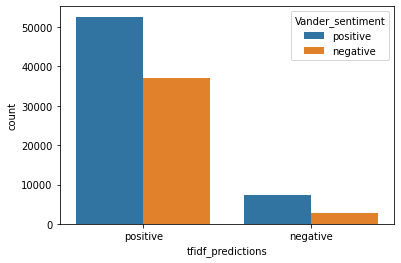

In [ ]:
sns.countplot(x=predictions['tfidf_predictions'],hue=predictions['Vander_sentiment'])

**Score- based sentiment classification**

In [19]:
X= data['Summary'].apply(lambda x: str(x))

In [20]:
y= data['Score'].apply(lambda x: 1 if x<2.5 else 0)  # if score<2.5 then negative sentiment else positive

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42)

In [22]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


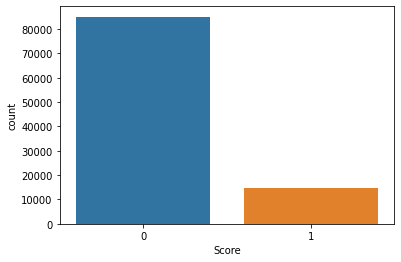

In [23]:
sns.countplot(y)

In [25]:
LR= LogisticRegression()

In [26]:
LR.fit(tfidf_train_vectors,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
lr_pred= LR.predict(tfidf_test_vectors)

In [30]:
cm= confusion_matrix(y_test, lr_pred)

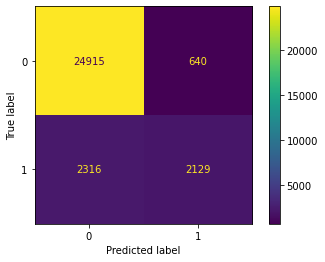

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LR.classes_)
disp.plot()

In [34]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     25555
           1       0.77      0.48      0.59      4445

    accuracy                           0.90     30000
   macro avg       0.84      0.73      0.77     30000
weighted avg       0.89      0.90      0.89     30000



In [36]:
print(f1_score(y_test,lr_pred))

0.5902411976711949


**Score Classification**

In [37]:
X= data['Text']
X=X.apply(lambda x: str(x))

y= data['Score']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42)

In [39]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

In [40]:
y.value_counts()

5    62412
4    14643
1     9318
3     8059
2     5568
Name: Score, dtype: int64

In [ ]:
rfc= RandomForestClassifier()

rfc.fit(tfidf_train_vectors, y_train)

score_prediction= rfc.predict(tfidf_test_vectors)

In [ ]:
cm= confusion_matrix(y_test, score_prediction)

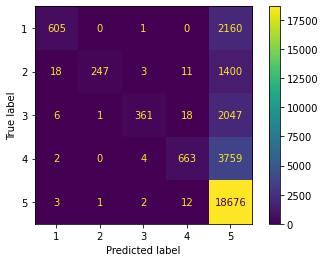

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test,score_prediction))

              precision    recall  f1-score   support

           1       0.95      0.22      0.36      2766
           2       0.99      0.15      0.26      1679
           3       0.97      0.15      0.26      2433
           4       0.94      0.15      0.26      4428
           5       0.67      1.00      0.80     18694

    accuracy                           0.69     30000
   macro avg       0.91      0.33      0.39     30000
weighted avg       0.78      0.69      0.60     30000



In [42]:
DT= DecisionTreeClassifier()

In [43]:
DT.fit(tfidf_train_vectors,y_train)

DecisionTreeClassifier()

In [44]:
DT_pred= DT.predict(tfidf_test_vectors)

In [45]:
cm= confusion_matrix(y_test, DT_pred)

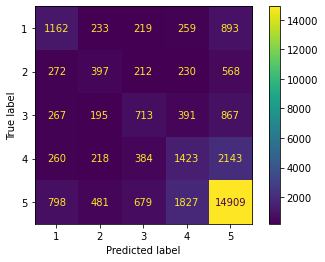

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DT.classes_)
disp.plot()

In [49]:
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           1       0.42      0.42      0.42      2766
           2       0.26      0.24      0.25      1679
           3       0.32      0.29      0.31      2433
           4       0.34      0.32      0.33      4428
           5       0.77      0.80      0.78     18694

    accuracy                           0.62     30000
   macro avg       0.42      0.41      0.42     30000
weighted avg       0.61      0.62      0.61     30000



In [50]:
LR= LogisticRegression()

In [51]:
LR.fit(tfidf_train_vectors, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
lr_pred= LR.predict(tfidf_test_vectors)

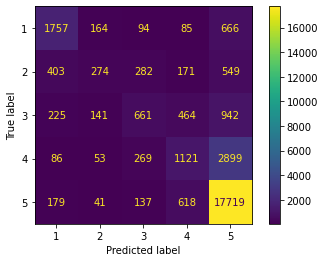

In [55]:
m= confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=m,display_labels=LR.classes_)
disp.plot()

In [56]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           1       0.66      0.64      0.65      2766
           2       0.41      0.16      0.23      1679
           3       0.46      0.27      0.34      2433
           4       0.46      0.25      0.33      4428
           5       0.78      0.95      0.85     18694

    accuracy                           0.72     30000
   macro avg       0.55      0.45      0.48     30000
weighted avg       0.67      0.72      0.68     30000

